<a href="https://colab.research.google.com/github/hardayal/EVA/blob/master/Session_2/EVA_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

**Importing Libraries**

---


 Keras is the open-source Neural network library written in Python, It has Tensorflow as backend
 https://keras.io/

In [1]:
!pip install -q keras # Installing through python package manager - pip
import keras # Importing keras

Using TensorFlow backend.


In [0]:

import numpy as np

# Importing Keras Functions
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

**Loading data**

---

 Loading Data and Doing train/test split for validation of model

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # Downloads MNIST data from host server and splits data

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


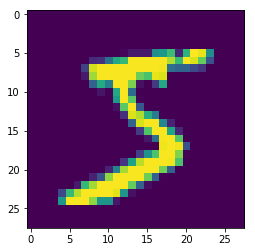

In [4]:
print (X_train.shape) # X_train shape gives us Number of images , height and width of image respectively
from matplotlib import pyplot as plt # Plotting Library in Python
# Shows Images embedded in the same Jupyter notebook
%matplotlib inline 
plt.imshow(X_train[0]) # Displaying First Image

In [5]:
X_train.shape[0]

60000

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1) # Converting into array of (6000,28,28,1) , here 6000 is number of images in training set, 28 -height , 28 - width, 1 indicates channel depth
X_test = X_test.reshape(X_test.shape[0], 28, 28,1) # same for X_test

Converting pixel values in numbers and normalising them to prevent skewness of data points

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10] # It gives the 1st 10 labels of the first 10 images , like 5 indicates it is number 5 in image correspondingly

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

 Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
Y_train = np_utils.to_categorical(y_train, 10) # One-hot-encoding of Y_train
Y_test = np_utils.to_categorical(y_test, 10) # same 

In [10]:
Y_train[:10] # Displaying one-hot encoding for 1st 10 labels


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**Defining Model Architecture**


In [11]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() # Means sequential block of following components            Input->Conv->Receptive Field (After Convolution Layer)
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))     #28*28*1         3*3
model.add(Convolution2D(64, 3, 3, activation='relu'))                            #26*26*32        5*5
model.add(Convolution2D(128, 3, 3, activation='relu'))                           #24*24*64        7*7

model.add(MaxPooling2D(pool_size=(2, 2)))                                        #22*22*128       14*14

model.add(Convolution2D(256, 3, 3, activation='relu'))                           #11*11*128       16*16
model.add(Convolution2D(512, 3, 3, activation='relu'))                           #9*9*256         18*18
model.add(Convolution2D(1024, 3, 3, activation='relu'))                          #7*7*512         20*20
model.add(Convolution2D(2048, 3, 3, activation='relu'))                          #5*5*1024        22*22
model.add(Convolution2D(10, 3, 3, activation='relu'))                            #3*3*2048        24*24

model.add(Flatten())                                                             #1*1*10
model.add(Activation('softmax'))

model.summary() # Tells about each layer and the parameters associated

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

 Defining the loss function , optimizer for back-prop and result metrics

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

**Training Model**

---

 Trains the model with Training set and batch size of 32 images at once in 10 epochs (1 epoch = all images seen)

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 118s 2ms/step - loss: 1.6005 - acc: 0.3988
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.3980 - acc: 0.4068
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.3769 - acc: 0.4099
Epoch 4/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.3745 - acc: 0.4100
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.3744 - acc: 0.4097
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.3724 - acc: 0.4101
Epoch 7/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.3712 - acc: 0.4103
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.3735 - acc: 0.4105
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 1.3799 - acc: 0.4100
Epoch 10/10
60000/60000 [==============================] - 115s 2ms/step - loss: 1.3710 - a

In [14]:
model.evaluate

<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x7f7f605919e8>>

**Evaluate Model Accuracy**

---


 Validates the model on testing set using evaluate function

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) # Returns the loss value & metrics values for the model in test mode

In [16]:
print(score) # prints loss and accuracy

[1.3794566675186157, 0.4067]


In [17]:
model.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f7f605919e8>>

In [0]:
y_pred = model.predict(X_test) # Generates output predictions for the input samples

In [19]:
print(y_pred[:9]) # 1st 10 Predictions (One-hot form)
print(y_test[:9]) # 1st 10 Predicted Labels

[[2.9144853e-10 2.9144853e-10 2.9144853e-10 2.9144853e-10 2.9144853e-10
  2.9144853e-10 2.9144853e-10 1.0000000e+00 2.9144853e-10 2.9144853e-10]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.9217570e-08 9.9999988e-01 1.9217570e-08 1.9217570e-08 1.9217570e-08
  1.9217570e-08 1.9217570e-08 1.9217570e-08 1.9217570e-08 1.9217570e-08]
 [1.0000000e+00 8.4163449e-13 8.4163449e-13 8.4163449e-13 8.4163449e-13
  8.4163449e-13 8.4163449e-13 8.4163449e-13 8.4163449e-13 8.4163449e-13]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [6.8965472e-11 1.0000000e+00 6.8965472e-11 6.8965472e-11 6.8965472e-11
  6.8965472e-11 6.8965472e-11 6.8965472e-11 6.8965472e-11 6.8965472e-11]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 

# Ideal Network


---

1) The Last Convolution layer has *Relu* activation layer specified which should not be there because Relu will simply throw away information without adding any    additional benefits 

2) The number of layers in the network to predict the images of size 28*28 is much more than needed. Due to this every layer is almost learning the same things. Number of layers = 8
   
3) Most importantly these many number of channels which are not required. As the images have not much complexity

4) Also sudden decrease in channel number from 2048 to 10 makes vital information to lose. Instead could have used 1*1 conv to mix the channels

5) We could also use batch norm to prevent network from overfitting

6) Batch Size could be made more so as to pass all varieties of images from a class

In [20]:
from keras.layers import Activation, MaxPooling2D

model2 = Sequential() # Means sequential block of following components            Input->Conv->Receptive Field (After Convolution Layer)
model2.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))   # 28*28*1         3*3
model2.add(Convolution2D(64, 3, 3, activation='relu'))                          # 26*26*32        5*5
model2.add(Convolution2D(128, 3, 3, activation='relu'))                         # 24*24*64        7*7

model2.add(MaxPooling2D(pool_size=(2, 2)))                                      # 22*22*128       14*14

model2.add(Convolution2D(256, 3, 3, activation='relu'))                         # 11*11*128       16*16
model2.add(Convolution2D(512, 3, 3, activation='relu'))                         # 9*9*256         18*18

model2.add(Convolution2D(1024, 3, 3, activation='relu'))                        # 7*7*512         20*20

model2.add(Convolution2D(10, 1, 1, activation='relu'))                          # 5*5*1024        22*22
model2.add(Convolution2D(10, 3, 3, activation='relu'))                          # 5*5*10        22*22
model2.add(Convolution2D(10, 3, 3))                                             # 3*3*10        24*24
model2.add(Flatten())                                                           # 1*1*10
model2.add(Activation('softmax'))

model2.summary() # Tells about each layer and the parameters associated

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

Defining the loss function , optimizer for back-prop and result metrics

In [0]:
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Trains the model with Training set and batch size of 32 images at once in 10 epochs (1 epoch = all images seen)

In [22]:
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 43s 712us/step - loss: 0.1904 - acc: 0.9425
Epoch 2/10
60000/60000 [==============================] - 42s 705us/step - loss: 0.0643 - acc: 0.9819
Epoch 3/10
60000/60000 [==============================] - 42s 694us/step - loss: 0.0452 - acc: 0.9868
Epoch 4/10
60000/60000 [==============================] - 42s 697us/step - loss: 0.0360 - acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.0292 - acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 42s 694us/step - loss: 0.0251 - acc: 0.9922
Epoch 7/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.0235 - acc: 0.9932
Epoch 8/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.0222 - acc: 0.9935
Epoch 9/10
60000/60000 [==============================] - 41s 688us/step - loss: 0.0199 - acc: 0.9943
Epoch 10/10
60000/60000 [==============================] - 42s 693us/step - loss: 

 Validates the model on testing set using evaluate function

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0) # Returns the loss value & metrics values for the model in test mode

In [24]:
print(score) # prints loss and accuracy

[0.037016594927517875, 0.9903]


**Some More Changes**

In [25]:
from keras.layers import Activation, MaxPooling2D

model3 = Sequential()

model3.add(Convolution2D(32,3,3,activation='relu', input_shape=(28,28,1)))

model3.add(Convolution2D(64,3,3,activation='relu'))

model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Convolution2D(128,3,3,activation='relu'))

model3.add(Convolution2D(256,3,3,activation='relu'))

model3.add(Convolution2D(512,3,3,activation='relu'))

model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Convolution2D(10,1,1,activation='relu'))

model3.add(Convolution2D(10,3,3))

model3.add(Flatten())                                                           # 1*1*10
model3.add(Activation('softmax'))

model3.summary() # Tells about each layer and the parameters associated


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 512)         1180160   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 512)         0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/p

 Defining the loss function , optimizer for back-prop and result metrics

In [0]:
model3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

 Trains the model with Training set and batch size of 32 images at once in 10 epochs (1 epoch = all images seen)

In [27]:
model3.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.2019 - acc: 0.9351
Epoch 2/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0499 - acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0352 - acc: 0.9893
Epoch 4/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0263 - acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0196 - acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0184 - acc: 0.9942
Epoch 7/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0154 - acc: 0.9947
Epoch 8/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0108 - acc: 0.9965
Epoch 9/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0115 - acc: 0.9961
Epoch 10/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0094 - 

 Validates the model on testing set using evaluate function

In [0]:
score = model3.evaluate(X_test, Y_test, verbose=0) # Returns the loss value & metrics values for the model in test mode

In [29]:
print(score) # prints loss and accuracy

[0.031128605020121724, 0.993]
